<a href="https://colab.research.google.com/github/freedomchurl/ElectricData2020/blob/LSTM/ExpectElec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MinMaxScaler(copy=True, feature_range=(0, 1))
Epoch 1/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0219 - val_loss: 1.3090e-04
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 1.7029e-04 - val_loss: 1.1937e-04
Epoch 3/10
400/400 [==============================] - 3s 6ms/step - loss: 1.3189e-04 - val_loss: 9.9325e-05
Epoch 4/10
400/400 [==============================] - 3s 7ms/step - loss: 1.0039e-04 - val_loss: 8.8100e-05
Epoch 5/10
400/400 [==============================] - 3s 7ms/step - loss: 7.8102e-05 - val_loss: 5.2785e-05
Epoch 6/10
400/400 [==============================] - 2s 6ms/step - loss: 5.8379e-05 - val_loss: 3.9641e-05
Epoch 7/10
400/400 [==============================] - 3s 6ms/step - loss: 4.3751e-05 - val_loss: 4.9184e-05
Epoch 8/10
400/400 [==============================] - 2s 6ms/step - loss: 3.6208e-05 - val_loss: 2.6110e-05
Epoch 9/10
400/400 [==============================] - 2s 6ms/step - loss: 3.3483e-05 - val_los

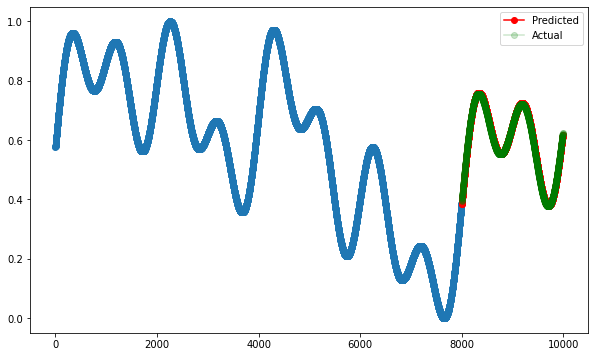

In [1]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding


def generateX(a, n):
     x_train = []
     y_train = []
     for i in range(len(a)):
         x = a[i:(i + n)]
         if (i + n) < len(a):
             x_train.append(x)
             y_train.append(a[i + n])
         else:
             break
     return np.array(x_train), np.array(y_train)

# load data from csv file
data = np.loadtxt("/content/drive/My Drive/lstmdata_2.csv", delimiter=",")

# 1D array to 2D array for minmaxScaler
t_data = data.transpose()
test_data = t_data.reshape(10000,1)

# data를 0 - 1 사이로
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(test_data))
uni_data = minMaxScaler.transform(test_data)

x, y = generateX(uni_data, 10)
x = x.reshape(-1,10,1)
y = y.reshape(-1,1)

# 학습용 데이터와 테스트 데이터
x_train = x[:8000, :, :]
y_train = y[:8000:, :]
x_test = x[8000:, :, :]
y_test = y[8000:, :]



# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = LSTM(10, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(LSTM(10))(xLstm_1)
xOutput = Dense(1)(xLstm_2)

model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')

# 학습 500 20
history = model.fit(x_train, y_train, epochs=10, batch_size=20,verbose=1, validation_data=(x_test, y_test))

# 예측
y_hat = model.predict(x_test, batch_size=1)


# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(8000,), 'o-')
plt.plot(b_axis, y_hat.reshape(1990,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(1990,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

In [7]:
# 모델 평가하기
acc = (y_hat - y_test) / y_test
acc2 = np.abs(acc) # 오차
accuracy = np.average(1-acc2)
print(accuracy)

 

0.9920981639769578
